In [66]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense
from scipy.interpolate import interp1d
import matplotlib.pyplot as plt

In [67]:
# Load the original dataset
data = pd.read_csv(r'C:\Users\sumaira\Downloads\data_generated.csv') 

In [68]:
# Extract the required columns
eta = data['eta']
Velocity = data['Velocity']
print(eta)
print(Velocity)

0      0.0000
1      0.0334
2      0.0669
3      0.1003
4      0.1338
        ...  
542    9.5819
543    9.5987
544    9.6154
545    9.6321
546    9.6488
Name: eta, Length: 547, dtype: float64
0      0.0899
1      0.0861
2      0.0827
3      0.0795
4      0.0764
        ...  
542    0.0001
543    0.0001
544    0.0001
545    0.0001
546    0.0001
Name: Velocity, Length: 547, dtype: float64


In [69]:
df = pd.DataFrame(data)
print(df)

        eta  Velocity
0    0.0000    0.0899
1    0.0334    0.0861
2    0.0669    0.0827
3    0.1003    0.0795
4    0.1338    0.0764
..      ...       ...
542  9.5819    0.0001
543  9.5987    0.0001
544  9.6154    0.0001
545  9.6321    0.0001
546  9.6488    0.0001

[547 rows x 2 columns]


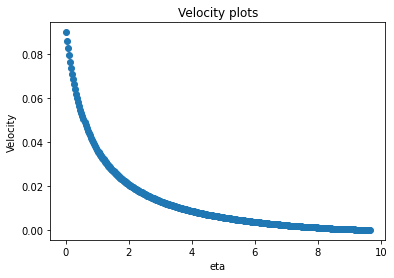

In [70]:
import matplotlib.pyplot as plt
# Scatter plot
plt.scatter(df['eta'], df['Velocity'])
plt.xlabel('eta')
plt.ylabel('Velocity')
plt.title('Velocity plots')
plt.show()

In [71]:
# Determine the minimum and maximum 'eta' values from the original dataset
min_eta = eta.min()
max_eta = eta.max()
print(min_eta)
print(max_eta)

0.0
9.6488


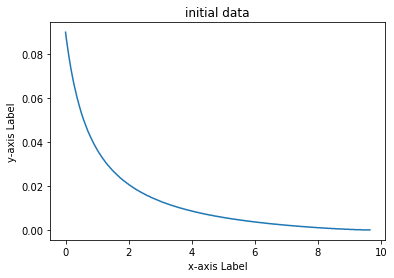

In [72]:
import matplotlib.pyplot as plt

# Assuming df has columns 'x' and 'y'
plt.plot(df['eta'], df['Velocity'])
plt.title('initial data')
plt.xlabel('x-axis Label')
plt.ylabel('y-axis Label')
plt.show()

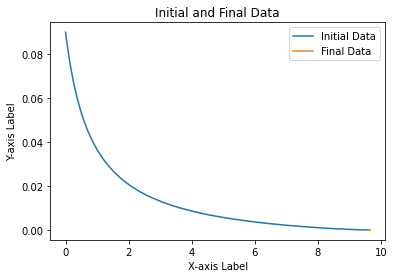

In [73]:
import matplotlib.pyplot as plt

# Assuming df has columns 'eta' and 'Velocity'
plt.plot(df['eta'], df['Velocity'], label='Initial Data')
plt.plot(df['eta'].tail(), df['Velocity'].tail(), label='Final Data')

plt.title('Initial and Final Data')
plt.xlabel('X-axis Label')
plt.ylabel('Y-axis Label')

plt.legend()  # This adds a legend to the plot to distinguish between initial and final data
plt.show()

In [74]:
# Generate a set of 'eta' values within the original range
new_eta_values = np.linspace(min_eta, max_eta, 100) # Adjust the number of values as needed

In [75]:
# Prepare the data for the neural network
X = np.array(eta).reshape(-1, 1) # Reshape to a 2D array
y = np.array(Velocity)

In [76]:
from sklearn.model_selection import train_test_split

# Split the data into 70% training and 30% temporary (testing + validation)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)

# Split the temporary data into 50% testing and 50% validation
X_test, X_val, y_test, y_val = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

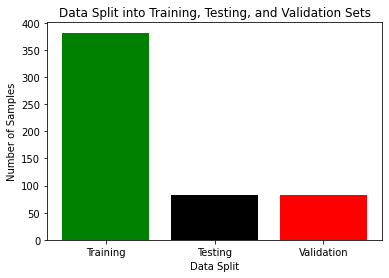

In [77]:
import matplotlib.pyplot as plt

# Define the sizes of the sets
train_size = len(X_train)
test_size = len(X_test)
validation_size = len(X_val)

# Create data labels
labels = ['Training', 'Testing', 'Validation']

# Create data sizes
sizes = [train_size, test_size, validation_size]

# Plot the data split as a bar graph
plt.bar(labels, sizes, color=['g', 'k', 'r'])
plt.xlabel('Data Split')
plt.ylabel('Number of Samples')
plt.title('Data Split into Training, Testing, and Validation Sets')
plt.show()

In [78]:
# Create the neural network model
model = Sequential()
model.add(Dense(10, input_dim=1, activation='tanh'))
model.add(Dense(1))
# Compile the model
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mean_absolute_error'])


In [79]:
# Train the model
h = model.fit(X_train, y_train, epochs=1000, batch_size=32, verbose=0)
# Train the model
model.fit(X_train, y_train, epochs=1000, batch_size=32, verbose=0)

In [80]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.callbacks import EarlyStopping
# Define early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

In [81]:
# Evaluate the model on the test set
loss, mae = model.evaluate(X_test, y_test)
print('Mean Absolute Error (MAE):', mae)
history = model.fit(X_train, y_train, epochs=100, validation_data=(X_val, y_val) ,callbacks=[early_stopping])
#history = model.fit(X_train, y_train, epochs=1000,validation_data=(X_val, y_val)) #validation_data=(X_val, y_val))

3/3 [==============================] - 0s 3ms/step - loss: 7.5012e-08 - mean_absolute_error: 1.8581e-04
Mean Absolute Error (MAE): 0.00018581011681817472
Epoch 1/100
12/12 [==============================] - 0s 7ms/step - loss: 1.3563e-07 - mean_absolute_error: 3.0164e-04 - val_loss: 1.8775e-07 - val_mean_absolute_error: 2.8540e-04
Epoch 2/100
12/12 [==============================] - 0s 5ms/step - loss: 7.4537e-08 - mean_absolute_error: 2.0728e-04 - val_loss: 2.0105e-07 - val_mean_absolute_error: 2.8338e-04
Epoch 3/100
12/12 [==============================] - 0s 4ms/step - loss: 8.8179e-08 - mean_absolute_error: 2.3986e-04 - val_loss: 4.4468e-07 - val_mean_absolute_error: 5.9867e-04
Epoch 4/100
12/12 [==============================] - 0s 5ms/step - loss: 2.5647e-07 - mean_absolute_error: 4.4697e-04 - val_loss: 1.6898e-07 - val_mean_absolute_error: 2.4114e-04
Epoch 5/100
12/12 [==============================] - 0s 5ms/step - loss: 2.7422e-07 - mean_absolute_error: 4.5263e-04 - val_loss: 

In [52]:
test_loss = model.evaluate(X_test, y_test)
print(f'Test Loss: {test_loss}')

3/3 [==============================] - 0s 8ms/step - loss: 3.3004e-07 - mean_absolute_error: 3.5684e-04
Test Loss: [3.300448270238121e-07, 0.0003568447136785835]


3/3 [==============================] - 0s 2ms/step - loss: 6.4357e-08 - mean_absolute_error: 1.5546e-04


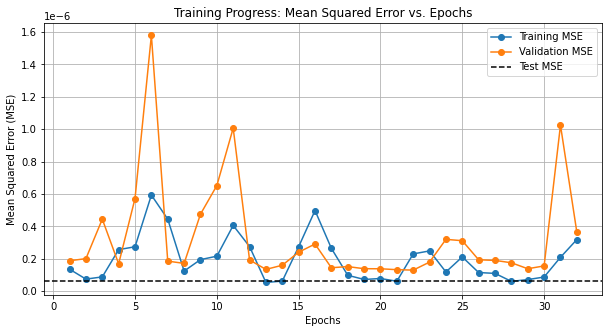

Test MSE: 6.435745092403522e-08


In [82]:
import matplotlib.pyplot as plt

# Compute the Mean Squared Error for the test dataset
test_mse = model.evaluate(X_test, y_test)[0]

# Extract the Mean Squared Error from the training history
train_mse = history.history['loss']  # Assuming 'loss' is the training loss
val_mse = history.history['val_loss']  # Use 'val_loss' for validation loss

# Create a list of epochs
epochs = range(1, len(train_mse) + 1)

# Plot the graph
plt.figure(figsize=(10, 5))
plt.plot(epochs, train_mse, marker='o', linestyle='-', label='Training MSE')
plt.plot(epochs, val_mse, marker='o', linestyle='-', label='Validation MSE')
plt.axhline(y=test_mse, color='k', linestyle='--', label='Test MSE')
plt.xlabel('Epochs')
plt.ylabel('Mean Squared Error (MSE)')
plt.title('Training Progress: Mean Squared Error vs. Epochs')
plt.legend()
plt.grid(True)
plt.show()

print(f'Test MSE: {test_mse}')


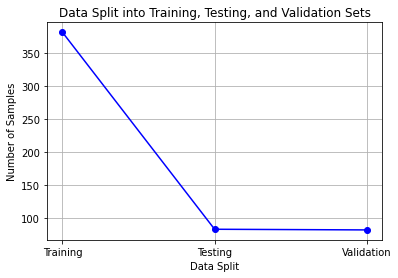

In [83]:
import matplotlib.pyplot as plt

# Define the sizes of the sets
train_size = len(X_train)
test_size = len(X_test)
validation_size = len(X_val)

# Create data labels
labels = ['Training', 'Testing', 'Validation']

# Create data sizes
sizes = [train_size, test_size, validation_size]

# Plot the data split as a line graph
plt.plot(labels, sizes, marker='o', linestyle='-', color='b')
plt.xlabel('Data Split')
plt.ylabel('Number of Samples')
plt.title('Data Split into Training, Testing, and Validation Sets')
plt.grid(True)
plt.show()

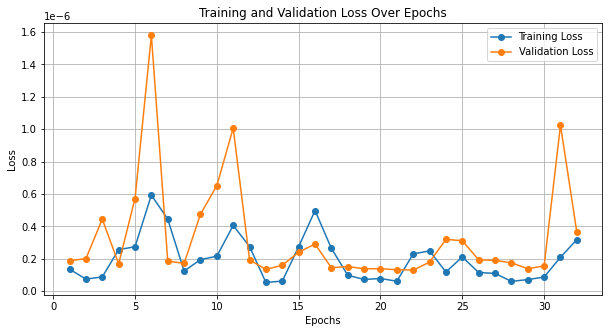

In [84]:
# Extract the loss values from the training history
train_loss = history.history['loss']
val_loss = history.history['val_loss']  # Use 'val_loss' for validation loss

# Create a list of epochs
epochs = range(1, len(train_loss) + 1)

# Plot the graph
plt.figure(figsize=(10, 5))
plt.plot(epochs, train_loss, marker='o', linestyle='-', label='Training Loss')
plt.plot(epochs, val_loss, marker='o', linestyle='-', label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss Over Epochs')
plt.legend()
plt.grid(True)
plt.show()

In [85]:
# Interpolate 'Velocity' values for the new 'eta' values
f = interp1d(eta, Velocity, kind='linear')
new_velocity_values = f(new_eta_values)


In [86]:
# Use your pre-trained model to make predictions on the new data
predictions = model.predict(new_eta_values.reshape(-1, 1))
print(predictions)

[[0.08712924]
 [0.07919475]
 [0.07202934]
 [0.06560317]
 [0.05987517]
 [0.05479587]
 [0.05030989]
 [0.04635869]
 [0.04288311]
 [0.03982497]
 [0.03712936]
 [0.03474526]
 [0.03262667]
 [0.030733  ]
 [0.02902921]
 [0.02748512]
 [0.02607557]
 [0.02477995]
 [0.02358133]
 [0.022466  ]
 [0.02142321]
 [0.02044406]
 [0.01952185]
 [0.01865089]
 [0.01782667]
 [0.01704584]
 [0.01630515]
 [0.0156021 ]
 [0.01493445]
 [0.01430029]
 [0.01369745]
 [0.01312449]
 [0.01257992]
 [0.01206179]
 [0.01156893]
 [0.01109966]
 [0.01065302]
 [0.01022741]
 [0.00982172]
 [0.00943457]
 [0.00906491]
 [0.00871204]
 [0.00837431]
 [0.00805113]
 [0.00774156]
 [0.00744478]
 [0.0071599 ]
 [0.00688638]
 [0.0066233 ]
 [0.00637016]
 [0.00612641]
 [0.00589143]
 [0.00566464]
 [0.0054456 ]
 [0.00523405]
 [0.00502953]
 [0.00483151]
 [0.00464002]
 [0.00445426]
 [0.00427431]
 [0.00409983]
 [0.00393042]
 [0.00376601]
 [0.00360636]
 [0.00345135]
 [0.00330073]
 [0.00315449]
 [0.00301228]
 [0.00287408]
 [0.00273973]
 [0.00260919]
 [0.00

In [87]:
# Evaluate the model's performance on the new data
mae = np.mean(np.abs(predictions - new_velocity_values))
print('Mean Absolute Error (MAE) for new data:', mae)

Mean Absolute Error (MAE) for new data: 0.016989215138765508


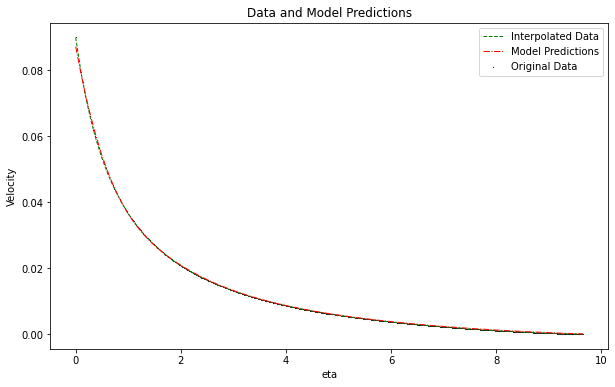

In [88]:
# Data Visualization
plt.figure(figsize=(10, 6))
plt.scatter(eta, Velocity, label='Original Data', color='black', s=1, linewidth=0.1)
plt.plot(new_eta_values, new_velocity_values, label='Interpolated Data', color='green', linestyle='--', linewidth=1)
plt.plot(new_eta_values, predictions, label='Model Predictions', color='red', linestyle='-.', linewidth=1)
plt.xlabel('eta')
plt.ylabel('Velocity')
plt.legend()
plt.title('Data and Model Predictions')
plt.show()


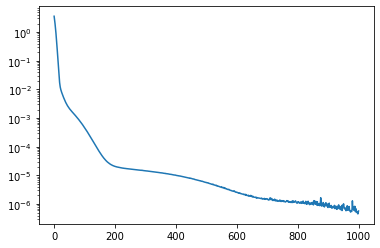

In [89]:
plt.semilogy(h.history['loss'])


In [90]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 10)                20        
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 11        
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


In [91]:
model.save_weights('trained-weights.hdf5')

In [92]:
# Save the model to a file
model.save('my_trained_model.h5')

In [93]:
from keras.models import load_model
# Load the model
loaded_model = load_model('my_trained_model.h5')

In [94]:
#Assuming you have new data X_new that you want to predict
# Determine the minimum and maximum 'eta' values from the original dataset
min_eta = eta.min()
max_eta = eta.max()
#print(min_eta)
# Generate a set of 'eta' values within the original range
new_eta_values = np.linspace(min_eta, max_eta, 100) # Adjust the number of values as needed
predictions = loaded_model.predict(new_eta_values)
#print(predictions)